### 3. Longest Substring Without Repeating Characters

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        left, right = 0, 1
        maxW = 0
        
        while right < len(s) + 1:
            window = s[left:right]
            #print(window)
            if len(window) > maxW:
                maxW = len(window)
            leftC = s[left]
            if right == len(s):
                right += 1
            else:
                rightC = s[right]
                if rightC in window:
                    left += 1
                else:
                    right += 1
        return maxW

- The way I approached this problem was to put pointers `left` and `right` on the first two characters in `s`, and consider the `window` inbetween the two pointers.
- Whenever the character to the right, `rightC`, would already appear in the `window`, we increase the `left` pointer by one; otherwise, we increase the right pointer by one.
- Furthermore, we keep track of the largest `window` in the variable `maxW`.

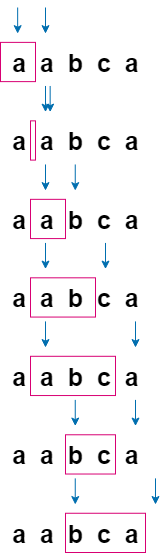

### 76. Minimum Window Substring

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        res = ""
        left,right = 0,0
        dic = defaultdict(int)
        for c in t:
            dic[c] += 1
        dicW = defaultdict(int)
        minW = 100000
        valid = False
        #print(f's: {s} t: {t} dic: {dict(dic)}')

        # increase window to the right until its valid and set valid flag if it is
        while right < len(s):
            if s[right] in list(dic.keys()):
                dicW[s[right]] += 1
            count = 0
            for k,v in dic.items():
                count += 1
                if not k in dicW.keys() or not dicW[k] >= v:
                    valid = False
                    break
                if count == len(dic):
                    valid = True
            if valid:
                break
            right += 1
        #print(f'[0.1]  {s[left:right+1]}  {dict(dicW)}')

        if valid:
            while ( s[left] in dicW.keys() and dicW[s[left]] > dic[s[left]] ) or ( not s[left] in dic.keys() ):
                if s[left] in dicW.keys():
                    dicW[s[left]] -= 1
                left += 1
        #print(f'[0.2]  {s[left:right+1]}  {dict(dicW)}')
    
        if valid and len(s[left:right+1]) < minW:
            minW = len(s[left:right+1])
            res = s[left:right+1]

        counter = 0
        while right < len(s):

            while right+1 < len(s) and not s[right+1] in dic.keys():
                right += 1
            right += 1
            if right < len(s):
                dicW[s[right]] += 1
            #print(f'[{counter+1}.1]  {s[left:right+1]}  {dict(dicW)}')
            
            while ( s[left] in dicW.keys() and dicW[s[left]] > dic[s[left]] ) or ( not s[left] in dic.keys() ):
                if s[left] in dicW.keys():
                    dicW[s[left]] -= 1
                left += 1
            #print(f'[{counter+1}.2]  {s[left:right+1]}  {dict(dicW)}')

            if len(s[left:right+1]) < minW:
                minW = len(s[left:right+1])
                res = s[left:right+1]

            counter += 1
        return res

- The way it works is that we move a sliding window over `s` until `right` is no longer inside the bounds of `s`, and in each iteration we first increase the window towards the `right` and then decrease it from the `left`.
- Starting with a `valid` window, we increase the window towards the `right` until we encounter the first character that is part of `t`, or until we have reached the end of `s`.
- Then we decrease the window from the `left` as long as the window stays `valid`, i.e., it contains all of the letters contained in `t`.
- Furthermore, we keep track of the smallest window with the variable `minW`.

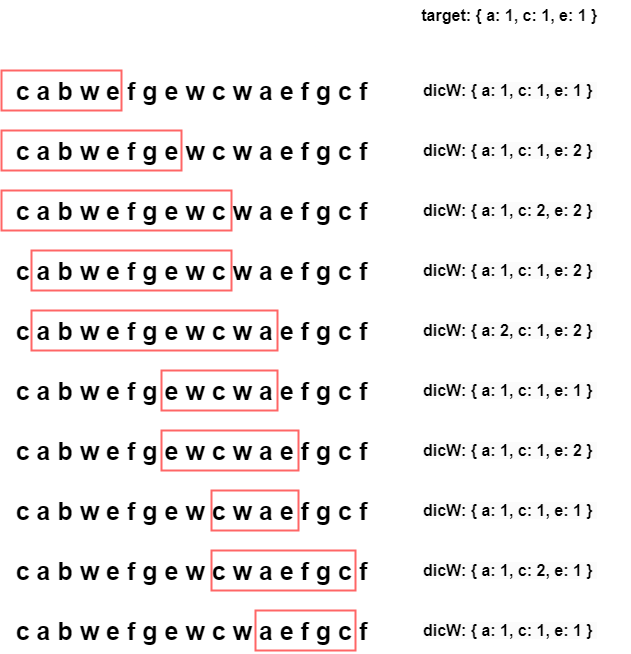

### 121. Best Time to Buy and Sell Stock:

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        maxP = 0
        last = 10000
        maxV = max(prices)
        for i,p in enumerate(prices):
            if p == maxV and maxV != 0 and i < len(prices) - 1:
                maxV = max(prices[i+1:len(prices)])
            if last <= p:
                continue
            profit = 0
            if i < len(prices) - 1:
                profit = maxV - p
            if profit > maxP:
                maxP = profit
                last = p
        return maxP

- I made the slight improvement that the maximum value, `max`, will only be recalculated when it is reached as `p`.
- Unfortunately, there was one test case that I was unsure how to pass, so I had to hardcode it with a conditional check to determine whether `maxV` is equal to `0`.

### 239. Sliding Window Maximum

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        d = collections.deque()
        l,r = 0,0
        res = []
        while r < len(nums):
            while d and nums[r] > nums[d[-1]]:
                d.pop()
            d.append(r)
            if d[0] < l:
                d.popleft()
            if r+1 >= k:
                l += 1
                res.append(nums[d[0]])
            r += 1
        return res

- For every new window, we pop every value that is smaller than the new right element `nums[r]` from the deque `d` such that `d[0]` will always hold the index to the largest value for each window.
- Every time we shift the window, we also have to ensure that `d` doesn't hold indices that are out of bounds to the left, which is ensured via the second conditional statement.

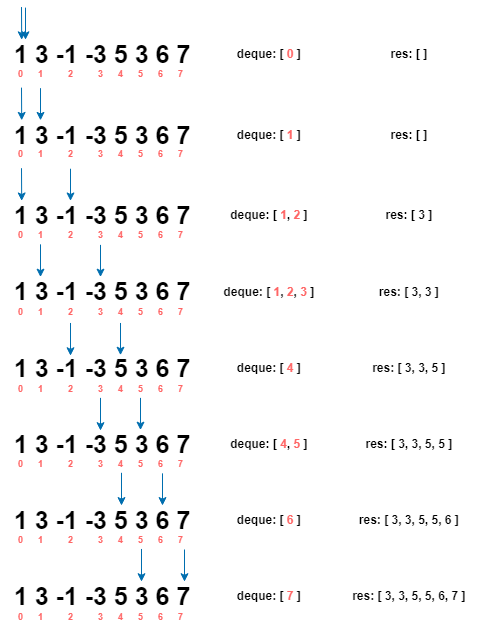

### 424. Longest Repeating Character Replacement

In [ ]:
class Solution:
    def isValid(self, window: str, k: int, freq: dict) -> bool:
        if window == '':
            return True
        maxKey = max(freq, key=freq.get)
        if len(window) - freq[maxKey] <= k:
            return True
        return False


    def characterReplacement(self, s: str, k: int) -> int:
        freq = defaultdict(int)
        left, right = 0,0
        maxW = 0

        while right < len(s) + 1:
            window = s[left:right]
            if self.isValid(window, k, freq):
                if len(window) > maxW:
                    maxW = len(window)
                #print(f's[{left}:{right}] = {window}, valid')
                if right < len(s):
                    freq[s[right]] += 1
                right += 1
            else:
                #print(f's[{left}:{right}] = {window}, invalid')
                freq[s[left]] -= 1
                left += 1
        return maxW

- The way it works is that we iterate over `s` with a sliding `window` between `left` and `right`, and check whether the amount of characters that would need to be replaced in that window is within the limit of replaceable characters `k`.
- This is ensured via the helper function `isValid`, which returns `True` when the amount of a window's characters that differ from it's most frequent character, i.e. the characters that would have to be replaced, is within the limit `k`.
- Whenever a window is valid, it will be extended to the `right` and when it is not valid, it's size will be decreased from the `left`.
- The size of the largest valid `window` is being tracked in the variable `maxW`.

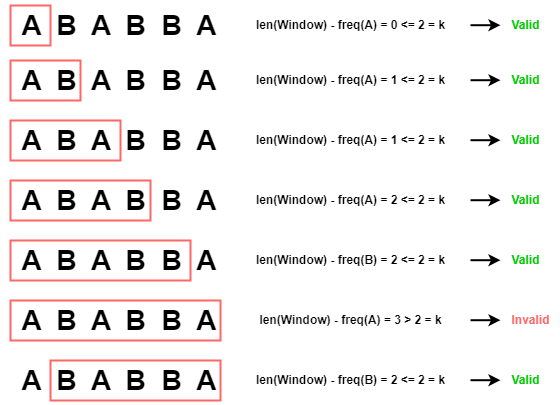

### 567. Permutation in String

In [ ]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        res = False
        left, right = 0,1
        freq = defaultdict(int)
        for c in s1:
            freq[c] += 1

        freqW = defaultdict(int)
        flag = False

        while right < len(s2) + 1:
            window = s2[left:right]
            if not flag:
                freqW[s2[right-1]] += 1
            #print(f'freq: {dict(freq)} freqW: {dict(freqW)} window: {window}')
            # invalid window
            if not s2[right-1] in freq.keys():
                freqW.clear()
                left = right
                right += 1
                flag = False
            # invalid window
            elif freqW[s2[right-1]] > freq[s2[right-1]]:
                freqW[s2[left]] -= 1
                left += 1
                flag = True
            # valid window
            else:
                if freqW == freq:
                    res = True
                    return res
                right += 1
                flag = False

        return res

- How it works is that we iterate over `s2` with a sliding `window` between `left` and `right`, and whenever the frequency of letters in `window`, `freqW`,  fits into the frequency of letters in `s1`, `freq`, we increase the window size towards the `right`.
- When this is not the case, we start with a new `window` on the next letter towards the right of our current `window`.

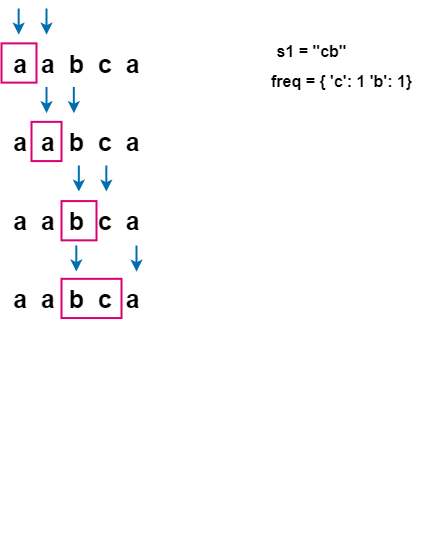

### 1658. Minimum Operations to Reduce X to Zero

In [ ]:
class Solution:
    def minOperations(self, nums: List[int], x: int) -> int:
        if sum(nums) < x:
            return -1
        if sum(nums) == x:
            return len(nums)
            
        left, right = 0, 0
        remainder, found = sum(nums), False
        window_sum, window_len, max_window = 0, 0, 0
        while left < len(nums) or right < len(nums):
            if remainder > x and right < len(nums):
                window_sum += nums[right]
                window_len += 1
                remainder -= nums[right]
                right += 1
            else:
                window_sum -= nums[left]
                window_len -= 1
                remainder += nums[left]
                left += 1
            if remainder == x: 
                found = True
                max_window = max(max_window, window_len)
        
        
        return len(nums) - max_window if found else -1

- This is a sliding window problem where you were supposed to find the largest sliding window such that the sum of the elements outside of the window is equal to `x`.
- Whenever the sum of the remaining elements, `remainder`, is greater than `x`, we increase the sliding window towards the `right`, and whenever the `remainder` is less than or equal to `x`, we decrease the sliding window from the `left`.
- Throughout this process, we keep track of the largest sliding window, `max_window`, where the `remainder` is equal to `x`.
- When the `right` part of the window has reached the end, we still want to decrease the `left` as long as we can to potentially find a `remainder` that is equal to `x`.

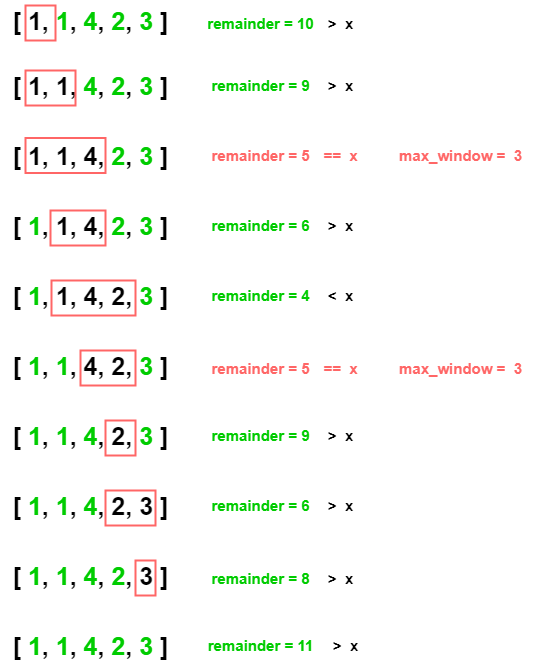